# Introduction

The center of mass of a book (modeled as a homogeneous cuboid of mass $m$, length $l$, and height $h$) lies directly above the top of a cylinder of radius $r$. There is sufficient friction to prevent slipping of the two surfaces when the book is perturbed from this equilibrium position. Let $\theta$ be the angle between the vertical and the radial line that passes through the contact point when the book oscillates in a vertical plane perpendicular to the axis of the cylinder.

![balancing book figure](fig/balancing-book.svg)

# Non-linear Equation of Motion

The book oscillates at an angular rate, $\dot{\theta}$, and the magnitude of the velocity of the center of mass of the book can be shown to be $v = \frac{1}{2} \sqrt{\left(h^{2} + 4 r^{2} \theta^{2}\right) \dot{\theta}^{2}}$. The moment of inertia of the book is approximately $\frac{m}{12} \left(h^{2} + l^{2}\right)$.

Thus, the total kinetic energy is:

$$T = \frac{m \dot{\theta}^{2}}{24} \left(h^{2} + l^{2}\right) + \frac{m \dot{\theta}^{2}}{8} \left(h^{2} + 4 r^{2} \theta^{2}\right)$$

The potential energy is:

$$U = - g m \left(\frac{h}{2} - r \theta \operatorname{sin}\left(\theta\right) + r - \left(\frac{h}{2} + r\right) \operatorname{cos}\left(\theta\right)\right)$$

The Langragian can be formed and then finally the equation of motion:

$$ - \frac{g h}{2} m \operatorname{sin}\left(\theta\right) + g m r \theta \operatorname{cos}\left(\theta\right) + \frac{h^{2} m}{3} \ddot{\theta} + \frac{l^{2} m}{12} \ddot{\theta} + m r^{2} \theta^{2} \ddot{\theta} + m r^{2} \theta \dot{\theta}^{2} = 0$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Question

Linearize the non-linear equation of motion about $\theta=0$ and type the result below:

$$- \frac{g h}{2} \theta + g r \theta + \frac{h^{2} \ddot{\theta}}{3} + \frac{l^{2} \ddot{\theta}}{12}=0$$

# Question

Derive an approximate expression for the natural frequency of small oscillations and compute the natural frequency in rad/s and Hz along with the period of osciallation. Use the parameters $m= 1.058\textrm{ kg}$, $l = 0.238 \textrm{ m}$, $g = 9.81 \textrm{ ms}^{-1}$, $h = 0.029 \textrm{ m}$, and $r=0.042 \textrm{ m}$, which correspond to the course texbook and a typical coffee mug.

$$\omega_n = \sqrt{\frac{6g(2r-h)}{4h^2 + l^2}}$$

In [3]:
m = 1.058  # kg
l = 0.238  # m
g = 9.81  # m/s^2
h = 0.029  # m
r = 0.042 # m

In [4]:
from IPython.display import Latex

omega_n = np.sqrt(6 * g * (2 * r - h) / (4 * h**2 + l**2))
Latex('$\omega_n = {:1.3f} \\textrm{{ rad/s}}$'.format(omega_n))

<IPython.core.display.Latex object>

In [5]:
Latex('$f_n = {:1.3f} \\textrm{{ Hz}}$'.format(omega_n / 2 / np.pi))

<IPython.core.display.Latex object>

In [6]:
Tn = 1 / (omega_n / 2 / np.pi)
Latex('$T_n = {:1.3f} \\textrm{{ s}}$'.format(Tn))

<IPython.core.display.Latex object>

# Question 2

Describe how the mass affects the natural frequency of the system.

The natural frequency of the system is not affected by the mass.

# Question 3

Are there any limits to the size of the book (the ratios $h/r$ or $l/r$) by a requirement of  stability of the oscillations? Said another way, how high a pile of books can you balance? Hint; it is probably difficult to balance a very high pile of book. Recall that if the effective stiffness is negative you will get unstable behavior in an $m$ $k$ model.

If the effective stiffness is less than zero, $k < 0$, the system will be unstable about the equilibrium point. The effective stiffness is:

$$k = r-\frac{h}{2}$$

so

$$r > \frac{h}{2}$$

for the system to be stable.

# Question 4

Simulate the linear and non-linear equations of motion that predict the free response of the book released from rest at an initial angle $\theta_0=1\textrm{ deg}$ for 10 seconds. Use `scipy.integrate.odeint` for the numerical integration. Plot the results of each simulation on the same graph.

In [7]:
from scipy.integrate import odeint

In [8]:
def eval_nonlin_rhs(x, t):
    """Evaluates the right hand side of the non-linear differential equations.
    
    Parameters
    ==========
    x : array_like, shape(2, )
        An array of the states: [theta, omega].
    t : float
        The value of time.
        
    Returns
    =======
    xdot : array_like, shape(2, )
        An array of the derivatives of the states: [thetadot, omegadot].
    
    """
    
    theta, omega = x
    
    thetadot = omega
    
    I = h**2 / 3 + l**2 / 12 + r**2 * theta**2
    
    omegadot = -(g * r * theta * np.cos(theta) + r**2 * theta * omega**2 - g * h * np.sin(theta) / 2) / I
    
    return thetadot, omegadot

In [9]:
def eval_lin_rhs(x, t):
    """Evaluates the right hand side of the non-linear differential equations.
    
    Parameters
    ==========
    x : array_like, shape(2, )
        An array of the states: [theta, omega].
    t : float
        The value of time.
        
    Returns
    =======
    xdot : array_like, shape(2, )
        An array of the derivatives of the states: [thetadot, omegadot].
    
    """
    
    theta, omega = x
    
    thetadot = omega
    
    I = h**2 / 3 + l**2 / 12
    
    omegadot = g * theta * (h / 2 - r) / I
    
    return thetadot, omegadot

Simulate the system.

In [10]:
t = np.linspace(0, 10, num=1000)

In [11]:
x_nonlin = odeint(eval_nonlin_rhs, [np.deg2rad(1), 0], t)
x_lin = odeint(eval_lin_rhs, [np.deg2rad(1), 0], t)

Plot the trajectory of $\theta$.

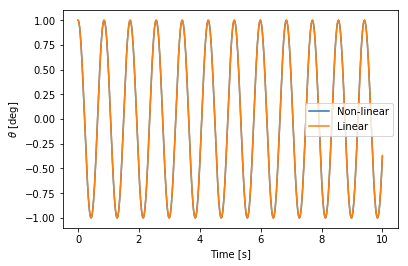

In [12]:
fig, ax = plt.subplots(1, 1)

ax.plot(t, np.rad2deg(x_nonlin[:, 0]))
ax.plot(t, np.rad2deg(x_lin[:, 0]))

ax.set_xlabel('Time [s]')
ax.set_ylabel('$\\theta$ [deg]')
ax.legend(['Non-linear', 'Linear']);

# Question

Using your program, create a function that calculates the period of the non-linear model to three significant figures of the 11 oscillations when $\theta_0= 1, 10 \textrm{ and } 20 \textrm{ deg}$. Compare these results to the period predicted by the linear model. By how much and why do they differ?

*Hint: Look for sign changes with `np.sign()`, use boolean indexing to extract important times, and finally `np.diff()` and `np.mean()` can be useful for finding the delta times and averaging. Note that `np.diff()` returns one fewer item in the array it operates on.*

In [13]:
def find_period(t, theta):
    """Computes the period of oscillation based on the trajectory of theta.
    
    Parameters
    ==========
    t : array_like, shape(n,)
        An array of monotonically increasing time values.
    theta : array_like, shape(n,)
        An array of values for theta at each time in ``t``.
        
    Returns
    =======
    T : float
        An estimate of the period of oscillation.
        
    """
    
    peak_idxs = np.diff(np.sign(theta)) < 0
    peak_idxs = np.hstack((peak_idxs, False))
    T = np.diff(t[peak_idxs]).mean()
       
    return T

In [14]:
T_d = find_period(t, x_nonlin[:, 0])
T_d

0.85540085540085542

In [15]:
x_nonlin = odeint(eval_nonlin_rhs, [np.deg2rad(10), 0], t)
T_d = find_period(t, x_nonlin[:, 0])
T_d

0.8645008645008645

In [16]:
x_nonlin = odeint(eval_nonlin_rhs, [np.deg2rad(20), 0], t)
T_d = find_period(t, x_nonlin[:, 0])
T_d

0.89189189189189189

# Question

Using your plot above plot the linear and non-linear time repsonses for $\theta_0=20 \textrm{ deg}$. What do you observe?

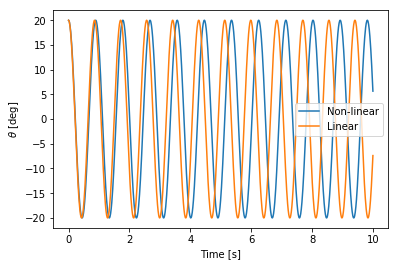

In [17]:
x_nonlin = odeint(eval_nonlin_rhs, [np.deg2rad(20), 0], t)
x_lin = odeint(eval_lin_rhs, [np.deg2rad(20), 0], t)

fig, ax = plt.subplots(1, 1)

ax.plot(t, np.rad2deg(x_nonlin[:, 0]))
ax.plot(t, np.rad2deg(x_lin[:, 0]))

ax.set_xlabel('Time [s]')
ax.set_ylabel('$\\theta$ [deg]')
ax.legend(['Non-linear', 'Linear']);

As time increases the non-linear system's period grows each cycle, whereas the linear system, as expected, has a constant period.

# Question

Make a plot of the period vs $\theta_0=1,2,..,25$ for the non-linear system. Also plot a horizontal line for the linear period for comparison using `ax.axhline()`.

*Hint: Use a `for` loop to iterate through `np.arange(1, 25)` and collect your results in an initially empty list with `.append()`.

In [18]:
initial_thetas = np.arange(1, 25)  # deg

periods = []

for theta0 in initial_thetas:
    x = odeint(eval_nonlin_rhs, [np.deg2rad(theta0), 0], t) 
    periods.append(find_period(t, x[:, 0]))

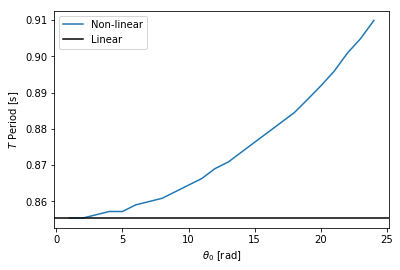

In [19]:
fig, ax = plt.subplots(1, 1)

ax.plot(initial_thetas, periods)
ax.axhline(Tn, color='black')

ax.set_xlabel(r'$\theta_0$ [rad]')
ax.set_ylabel(r'$T$ Period [s]')
ax.legend(['Non-linear', 'Linear']);

# Question

Compare the period predicted by your model to the period measured in class. If it does not match, what are the possible explanations? Is the linear model a good model to use for predicting motion of the system?

In class, we measured 7 cycles at 5.93 seconds so the period is:

In [20]:
Tn_meas = 5.93 / 7
Tn_meas, Tn

(0.8471428571428571, 0.85544673084897527)

The percent error is less than 1%! Pretty good model!

In [21]:
(Tn - Tn_meas) / Tn * 100

0.97070611256847361

# Question

Derive the expression for the magnitude of the velocity of the center of mass of the book and the height value used in the potential energy expression.

There are three components of velocity you must account for. The magnitude of the tangential velocity component is $(r + h/2) \dot{\theta} - r \dot{\theta}$ and the radial component is $r\theta\dot{\theta}$. If you the find the mangitude with respect to these two components you get:

$$|v| = \sqrt{\left[\left(r + \frac{h}{2}\right)\dot{\theta} - r\dot{\theta}\right]^2 + (r\theta\dot{\theta})^2}$$

which reduces to

$$|v| = \frac{1}{2} \sqrt{\left(h^{2} + 4 r^{2} \theta^{2}\right)\dot{\theta}^2}$$

For the potential energy the height above the center of the circle can be shown to be:

$$h = \left(r + \frac{h}{2}\right) \cos\theta + r \theta \sin\theta$$

The potential increases as $\theta$ increases so:

$$ U = mgh = mg \left[\left(r + \frac{h}{2}\right) \cos\theta + r \theta \sin\theta\right]$$